In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("apples_dataset_semicolon.csv", sep=";")
df.head()

,Weight,Redness,Label
0,205.357886,0.733305,1
1,173.010939,0.727020,1
2,180.492302,0.731464,1
3,186.112744,0.793850,1
4,168.166155,0.756035,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   500 non-null    float64
 1   Redness  500 non-null    float64
 2   Label    500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [9]:
df.describe()

,Weight,Redness,Label
count,500.000000,500.000000,500.000000
mean,164.319385,0.598903,0.500000
std,22.271231,0.174832,0.500501
min,95.994309,0.193705,0.000000
25%,149.186786,0.450924,0.000000
50%,166.152824,0.607056,0.500000
75%,180.235606,0.742005,1.000000
max,213.899205,1.000000,1.000000


In [11]:
df.isna().sum()

Weight     0
Redness    0
Label      0
dtype: int64

In [13]:
df['Label'].value_counts()

Label
1    250
0    250
Name: count, dtype: int64

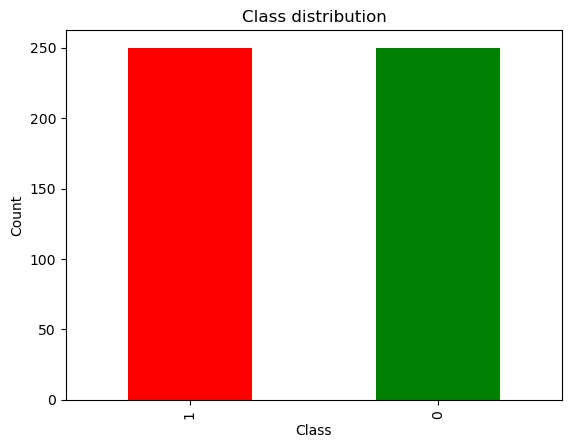

In [15]:
df['Label'].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

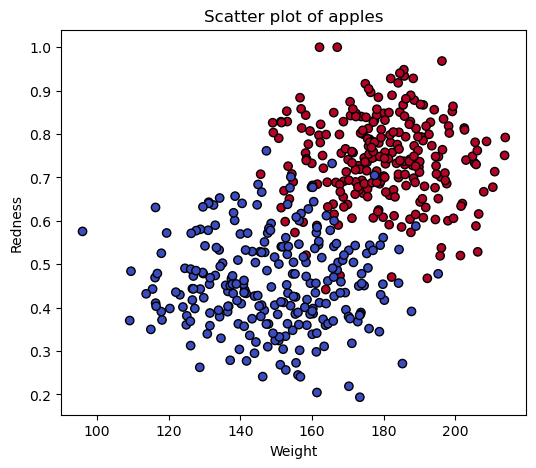

In [17]:
plt.figure(figsize=(6,5))
plt.scatter(df['Weight'], df['Redness'], c=df['Label'], cmap='coolwarm', edgecolor='k')
plt.xlabel("Weight")
plt.ylabel("Redness")
plt.title("Scatter plot of apples")
plt.show()

# Train/Test Split + Z-score normalization

Necessary for k-NN, which is highly sensitive to differences in feature scales.

In [21]:
X = df[['Weight', 'Redness']].values
y = df['Label'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Scaler is trained over train dataset to prevent from data leakage.

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

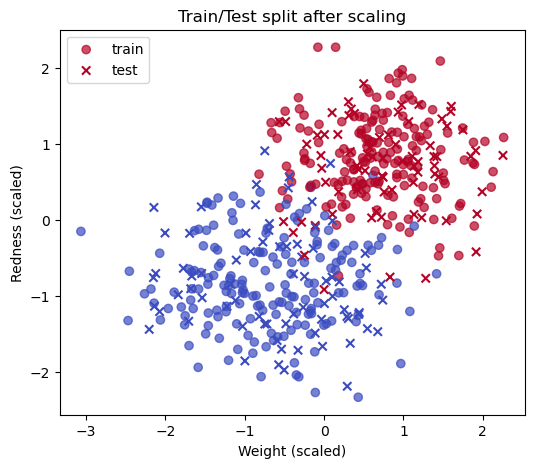

In [37]:
plt.figure(figsize=(6,5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap='coolwarm', alpha=0.7, label='train')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test, cmap='coolwarm', marker='x', label='test')
plt.xlabel("Weight (scaled)")
plt.ylabel("Redness (scaled)")
plt.title("Train/Test split after scaling")
plt.legend()
plt.show()

# k-Nearest Neighbors implementation (from scratch)

The algorithm was implemented manually without using scikit-learn.
Steps:

- Euclidean distance is used as the metric.

- For each test point we compute distances to all training samples.

- We select the k nearest neighbors based on smallest distances.

- A majority vote is performed to determine the predicted class.

- In case of a tie between two classes, class 1 is chosen, as required.

The model is evaluated for all odd values and the best one is selected based on test accuracy.

In [45]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [47]:
def get_k_nearest_neighbors(X_train, y_train, x, k):
    # distance from x to every point in training data
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    
    # indexes of k-min distanced points
    k_idx = np.argsort(distances)[:k]
    
    # label of k-nearest neighbours 
    return y_train[k_idx]

In [49]:
def majority_vote(neighbors):
    # counting neighbours' classes
    counts = np.bincount(neighbors)
    
    # priority for majority
    if len(counts) > 1 and counts[0] == counts[1]:
        return 1
    else:
        return np.argmax(counts)

In [51]:
def knn_predict_one(X_train, y_train, x, k):
    neighbors = get_k_nearest_neighbors(X_train, y_train, x, k)
    return majority_vote(neighbors)

In [53]:
def knn_predict(X_train, y_train, X_test, k):
    return np.array([knn_predict_one(X_train, y_train, x, k) for x in X_test])

In [55]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [57]:
k_values = list(range(1, 52, 2))  # odd numbers

results = []

for k in k_values:
    y_pred_test = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    test_acc = accuracy(y_test, y_pred_test)

    y_pred_train = knn_predict(X_train_scaled, y_train, X_train_scaled, k)
    train_acc = accuracy(y_train, y_pred_train)

    results.append((k, train_acc, test_acc))

results

[(1, 1.0, 0.8933333333333333),
 (3, 0.9742857142857143, 0.92),
 (5, 0.9742857142857143, 0.9066666666666666),
 (7, 0.98, 0.9),
 (9, 0.9771428571428571, 0.9),
 (11, 0.9771428571428571, 0.9066666666666666),
 (13, 0.9742857142857143, 0.9066666666666666),
 (15, 0.98, 0.9133333333333333),
 (17, 0.98, 0.9133333333333333),
 (19, 0.9771428571428571, 0.9133333333333333),
 (21, 0.9771428571428571, 0.9066666666666666),
 (23, 0.9771428571428571, 0.9133333333333333),
 (25, 0.9742857142857143, 0.9133333333333333),
 (27, 0.9742857142857143, 0.9133333333333333),
 (29, 0.9742857142857143, 0.9133333333333333),
 (31, 0.9742857142857143, 0.9133333333333333),
 (33, 0.9742857142857143, 0.9133333333333333),
 (35, 0.9714285714285714, 0.9066666666666666),
 (37, 0.9742857142857143, 0.9133333333333333),
 (39, 0.9742857142857143, 0.9066666666666666),
 (41, 0.9714285714285714, 0.9066666666666666),
 (43, 0.9714285714285714, 0.9066666666666666),
 (45, 0.9714285714285714, 0.9066666666666666),
 (47, 0.9685714285714285,

In [88]:
best_k_min = max(results, key=lambda x: x[2])[0]
best_k_min

3

In [90]:
df_results = pd.DataFrame(results, columns=['k', 'train_acc', 'test_acc'])

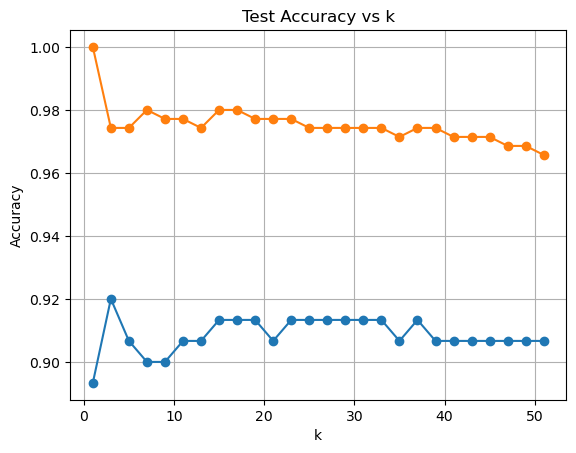

In [92]:
plt.plot(df_results['k'], df_results['test_acc'], marker='o')
plt.plot(df_results['k'], df_results['train_acc'], marker='o')
plt.title("Test Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Decision boundary for best k 

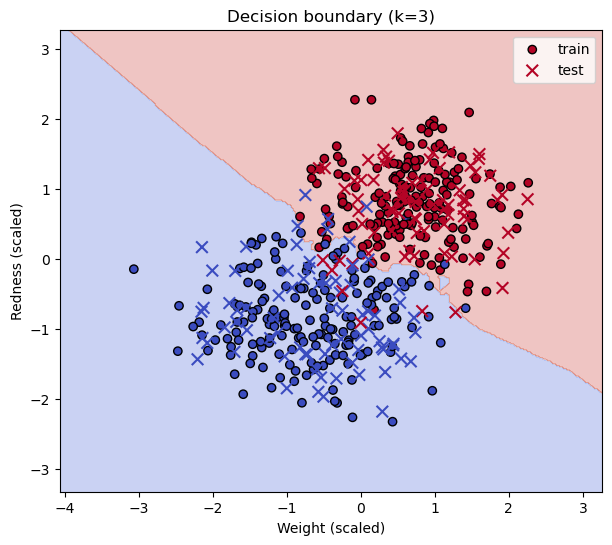

In [95]:
# generate grid with values
x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
) # grid of data not connected with our dataset in the range of min/max of its values 

# prediction for every point of the generated grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_predict(X_train_scaled, y_train, grid_points, best_k)
Z = Z.reshape(xx.shape)

# plot the border line
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# train and test points
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train,
            cmap='coolwarm', edgecolor='k', label='train')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test,
            cmap='coolwarm', marker='x', s=70, label='test')

plt.title(f"Decision boundary (k={best_k})")
plt.xlabel("Weight (scaled)")
plt.ylabel("Redness (scaled)")
plt.legend()
plt.show()

Confusion matrix 2×2

In [98]:
y_pred_test = knn_predict(X_train_scaled, y_train, X_test_scaled, best_k)
cm = confusion_matrix(y_test, y_pred_test)

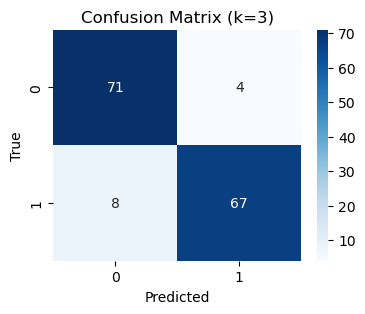

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
Add visualization: decision boundary for best k, confusion matrix